# Identifing Pneumonia Detection using Deep learning

#### Loading Libraries

In [3]:
#Loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras import layers
from keras.applications.vgg16 import preprocess_input

import warnings as w

#### Data Preprocessing

In [4]:
train_dir = '../input/chest-xray-pneumonia/chest_xray/train'
val_dir = '../input/chest-xray-pneumonia/chest_xray/val'
test_dir = '../input/chest-xray-pneumonia/chest_xray/test'

In [5]:
img_height = 128
img_width = 128
batch_size = 32

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    color_mode='grayscale',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    color_mode='grayscale',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    color_mode='grayscale',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [7]:
train_ds.class_names

['NORMAL', 'PNEUMONIA']

#### Data Visualization

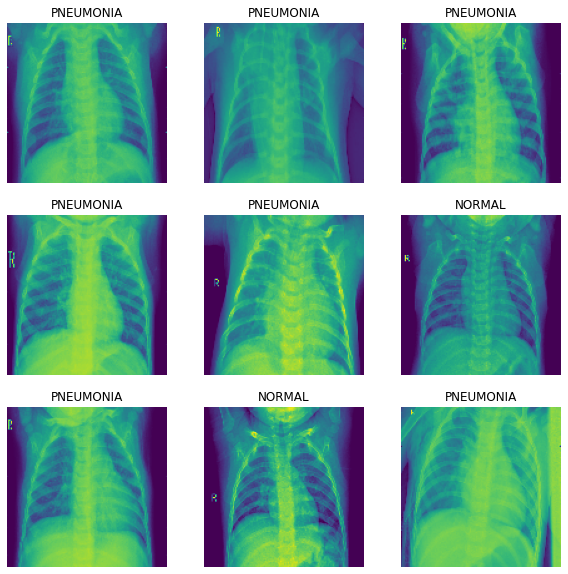

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype("uint8")))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

#### Deep learning Modelling

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
model = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [11]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [12]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10


c:\Users\Ammon\anaconda3\lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.8415 - loss: 0.3891 - val_accuracy: 0.6250 - val_loss: 0.8746
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.9597 - loss: 0.1152 - val_accuracy: 0.8750 - val_loss: 0.3237
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.9621 - loss: 0.0972 - val_accuracy: 0.9375 - val_loss: 0.1904
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.9711 - loss: 0.0759 - val_accuracy: 0.7500 - val_loss: 0.5474
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.9762 - loss: 0.0637 - val_accuracy: 1.0000 - val_loss: 0.1023
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.9796 - loss: 0.0610 - val_accuracy: 0.8750 - val_loss: 0.3809
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.9790 - loss: 0.0513 - val_accuracy: 0.7500 - val_loss: 0.6514
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.9835 - loss: 0.0455 - val_accuracy: 0.

#### Evaluation

In [14]:
model.evaluate(test_ds)

 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7812 - loss: 1.4480

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7642 - loss: 1.9089


[2.0714969635009766, 0.7516025900840759]